## Transfer Learning VGG 16 and VGG 19 using Keras

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Please download the dataset from the below url

In [2]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [8]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [9]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Deep Learning/CatDog/training_set'
valid_path = '/content/drive/MyDrive/Deep Learning/CatDog/test_set'


In [10]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




80142336/80134624 [==============================] - 0s 0us/step


In [11]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [12]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Deep Learning/CatDog/training_set/*')

In [13]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [15]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [16]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [18]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Deep Learning/CatDog/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5747 images belonging to 2 classes.


In [20]:
test_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/Deep Learning/CatDog/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                          class_mode = 'categorical')

Found 2023 images belonging to 2 classes.


In [21]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [23]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
180/180 [==============================] - 1168s 6s/step - loss: 0.2570 - accuracy: 0.8912 - val_loss: 0.2218 - val_accuracy: 0.9026
Epoch 2/5
180/180 [==============================] - 94s 524ms/step - loss: 0.1956 - accuracy: 0.9161 - val_loss: 0.2915 - val_accuracy: 0.8759
Epoch 3/5
180/180 [==============================] - 94s 524ms/step - loss: 0.1671 - accuracy: 0.9323 - val_loss: 0.2203 - val_accuracy: 0.9081
Epoch 4/5
180/180 [==============================] - 94s 523ms/step - loss: 0.1490 - accuracy: 0.9374 - val_loss: 0.2096 - val_accuracy: 0.9150
Epoch 5/5
180/180 [==============================] - 94s 522ms/step - loss: 0.1478 - accuracy: 0.9370 - val_loss: 0.2212 - val_accuracy: 0.9194


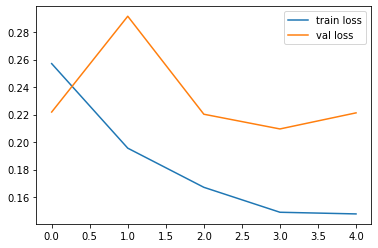

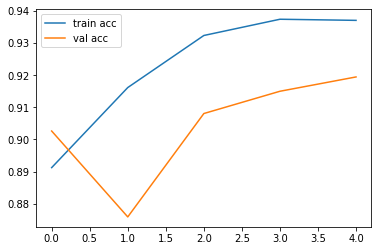

<Figure size 432x288 with 0 Axes>

In [25]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [27]:

y_pred = model.predict(test_set)


In [28]:

y_pred

array([[3.48350091e-04, 9.99651670e-01],
       [3.74477992e-07, 9.99999642e-01],
       [9.96884763e-01, 3.11527378e-03],
       ...,
       [9.99676704e-01, 3.23331333e-04],
       [9.99920964e-01, 7.90302802e-05],
       [9.99986053e-01, 1.39497815e-05]], dtype=float32)

In [29]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [30]:
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [31]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [32]:
img_data

NameError: ignored

In [33]:
img=image.load_img('/content/drive/MyDrive/Deep Learning/CatDog/test_set/cats/cat.4005.jpg',target_size=(224,224))



In [34]:
x=image.img_to_array(img)
x

array([[[226., 228., 227.],
        [253., 255., 254.],
        [222., 224., 223.],
        ...,
        [246., 249., 254.],
        [250., 253., 255.],
        [248., 251., 255.]],

       [[247., 249., 248.],
        [248., 250., 249.],
        [213., 215., 214.],
        ...,
        [243., 246., 251.],
        [242., 245., 250.],
        [237., 240., 245.]],

       [[249., 251., 250.],
        [237., 239., 238.],
        [219., 221., 220.],
        ...,
        [237., 240., 245.],
        [239., 242., 247.],
        [236., 239., 244.]],

       ...,

       [[246., 239., 197.],
        [250., 243., 201.],
        [253., 248., 208.],
        ...,
        [252., 255., 231.],
        [250., 254., 227.],
        [248., 253., 221.]],

       [[255., 245., 205.],
        [255., 243., 203.],
        [255., 250., 211.],
        ...,
        [254., 255., 238.],
        [251., 254., 233.],
        [248., 252., 227.]],

       [[255., 248., 209.],
        [255., 242., 203.],
        [255., 2

In [35]:
x.shape

(224, 224, 3)

In [36]:
x=x/255

In [37]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [42]:
a=model.predict(img_data)

In [39]:
a=np.argmax(model.predict(img_data), axis=1)

In [43]:
a

array([[1.0000000e+00, 4.9678206e-08]], dtype=float32)

In [45]:
if a[0][0]>=0.5:
    print("The image is classified as Cat")
else:
    print("The image is classfied as Dog")

The image is classified as Cat
